In [33]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

#### Montando entorno

In [1]:
import os

# Obtiene la ubicación completa del archivo del notebook
notebook_path = os.path.realpath('__file__')

# Obtiene la ruta absoluta de la carpeta "Coderhouser-DS-TP0002" sin importar donde te encuentres
path_base = os.path.abspath(os.path.join(notebook_path, "..", "..", "..", "Coderhouser-DS-TP0002"))

print("Path base':", path_base)

Path base': C:\develoment\Coderhouser-DS-TP0002\Coderhouser-DS-TP0002


In [4]:
import sys
sys.path.append(path_base + r"\models")

In [21]:
# Importacion de sklearn para el modelo KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [6]:
# Importacion el paquete de funciones bases custom
from funciones import model_train_test, notificar
import joblib

ModuleNotFoundError: No module named 'funciones'

In [30]:
# Generando el Dataframe del dataset base
df = pd.read_csv( path_base + r"\\data\procesed\blueTeam.csv")
test_data = pd.read_csv( path_base + r"\\data\procesed\redTeam.csv")

#### Definiendo Features

In [19]:
features = ["Kills", "Assists", "Deaths", "WardsPlaced", "WardsDestroyed", "GoldDiff", "ExperienceDiff"]

### Construyendo el modelo KNN
Este fragmento de código es esencial para preparar los datos antes de realizar cualquier análisis o modelado. La selección y estandarización de características son pasos cruciales para garantizar que los datos estén en un formato adecuado y que las características tengan una escala comparable, lo que puede mejorar la eficacia y la interpretación de los análisis posteriores.

In [17]:
droppedVariables = ["FirstBlood", "EliteMonsters", "TotalGold", "TotalExperience", "TotalMinionsKilled", "TotalJungleMinionsKilled", "CSPerMin", "GoldPerMin"]
dataCleaned = df.drop(droppedVariables, axis = 1)

In [18]:
X = dataCleaned.drop("Wins", axis = 1)
y = dataCleaned["Wins"]

In [20]:
selected_features = df[features]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

- selected_features = blueTeam[features]: Esto selecciona las columnas de características específicas del equipo "blue" que se utilizarán para el análisis. La variable features debe contener los nombres de las columnas que deseas seleccionar.

- scaler = StandardScaler(): Se crea una instancia del escalador StandardScaler de scikit-learn. Este escalador se utilizará para estandarizar los datos, lo que significa que se centrarán alrededor de cero y tendrán una desviación estándar de uno.

- scaled_features = scaler.fit_transform(selected_features): Aquí se aplica el escalador a las características seleccionadas del equipo "blue". El método fit_transform ajusta el escalador a los datos y luego transforma las características para que estén estandarizadas. El resultado, scaled_features, será una matriz con las características estandarizadas que se utilizarán en el análisis.

#### División de Datos:
En estas líneas, los datos se dividen en características (X) y etiquetas (y). Luego, se realizan divisiones adicionales para crear conjuntos de entrenamiento (X_train, y_train) y prueba (X_test, y_test) utilizando train_test_split. Se especifica un tamaño de prueba del 20% y se utiliza stratify para asegurarse de que la proporción de etiquetas en los conjuntos de prueba y entrenamiento sea similar.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

#### Estandarización de Características:
Aquí, se crea una instancia del escalador StandardScaler y se utiliza para estandarizar las características en los conjuntos de entrenamiento y prueba. fit_transform se usa en el conjunto de entrenamiento y transform en el conjunto de prueba para garantizar que se utilicen los mismos parámetros de escalado.

In [24]:
scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.transform(X_test)

#### Entrenamiento del Modelo KNN:
Se crea una instancia del clasificador KNN con 10 vecinos cercanos. Luego, se llama a la función personalizada model_train_test para entrenar y evaluar el modelo. Esta función imprimirá un informe de clasificación y mostrará una matriz de confusión para evaluar el rendimiento del modelo.

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       990
           1       0.73      0.64      0.68       986

    accuracy                           0.70      1976
   macro avg       0.71      0.70      0.70      1976
weighted avg       0.71      0.70      0.70      1976



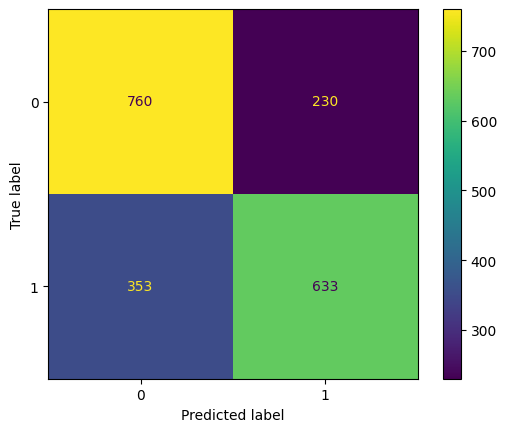

In [27]:
knn = KNeighborsClassifier(n_neighbors = 10)
model_train_test(knn, X_train_scaled, X_test_scaled, y_train, y_test)

#### Visualización de la Precisión:
En este bloque de código, se itera a través de diferentes valores para el número de vecinos (i) en el rango de 1 a 24. Se crea una instancia de KNN con el número actual de vecinos y se entrena con el conjunto de entrenamiento escalado. La precisión del modelo en el conjunto de prueba se almacena en la lista score.

Se crea un gráfico de dispersión que muestra cómo varía la precisión del modelo KNN en función del número de vecinos. Se establece el número de vecinos en el eje X y la precisión en el eje Y. Además, se configuran títulos y etiquetas para mejorar la comprensión del gráfico.

In [29]:
max_accuracies = {}
score = []

for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    score.append(knn.score(X_test_scaled, y_test))

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(1, 25)), y=score, mode='lines+markers'))
fig.update_xaxes(tickvals=list(range(1, 25)))
fig.update_layout(
    title="Variación de la precisión con el número de vecinos (K-Nearest Neighbors)",
    xaxis_title="Números de vecinos",
    yaxis_title="Exactitud",
)

max_accuracy = max(score) * 100
max_accuracy_K = score.index(max(score)) + 1

print("La máxima precisión de K-Vecinas más cercanas es {:.2f}%".format(max_accuracy),
      "Con el número de vecinas establecida en", max_accuracy_K, "neighbours.")

fig.show()

La máxima precisión de K-Vecinas más cercanas es 71.81% Con el número de vecinas establecida en 19 neighbours.


#### Aplicando modelo con redTeam
El siguiente informe presenta la evaluación del modelo KNN aplicado a los datos del equipo redTeam. El objetivo de este análisis es determinar la capacidad del modelo entrenado en los datos del equipo blueTeam para generalizar y realizar predicciones precisas en el contexto de los datos del equipo redTeam.

In [31]:
droppedVariablesRed = droppedVariables + ["Wins"]
redTeam_selected_features = test_data.drop(droppedVariablesRed, axis=1)
redTeam_scaled_features = scaling.transform(redTeam_selected_features)  # Usar el mismo escalador

# Predicciones en los datos de redTeam
redTeam_predictions = knn.predict(redTeam_selected_features)
test_data["KNN_Predictions"] = redTeam_predictions

c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [36]:
# Calcular la suma de "Wins" y "KNN_Predictions"
total_wins = test_data["Wins"].sum()
total_knn_predictions = test_data["KNN_Predictions"].sum()

# Crear un DataFrame con los totales
totals = pd.DataFrame({"Categoría": ["Wins", "KNN_Predictions"],
                       "Total": [total_wins, total_knn_predictions]})

# Crear un gráfico de barras
fig = px.bar(totals, x="Categoría", y="Total", text="Total",
             title="Comparación del Total de Wins vs KNN_Predictions",
             labels={"Categoría": "Categoría", "Total": "Total"})

# Mostrar el gráfico
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

In [39]:

# Calcular la cantidad de filas en las que "Wins" y "KNN_Predictions" coinciden
coincidencias = test_data[(test_data["Wins"] == 1) & (test_data["KNN_Predictions"] == 1)]

# Calcular la cantidad de filas en las que "Wins" y "KNN_Predictions" no coinciden
no_coincidencias = test_data[(test_data["Wins"] == 0) & (test_data["KNN_Predictions"] == 1)]

# Crear un DataFrame con los totales
resultados = pd.DataFrame({"Resultado": ["Coincidencias", "No Coincidencias"],
                           "Cantidad": [len(coincidencias), len(no_coincidencias)]})

# Crear un gráfico de barras
fig = px.bar(resultados, x="Resultado", y="Cantidad",
             title="Eficiencia del Modelo (Coincidencias vs No Coincidencias)",
             labels={"Resultado": "Resultado", "Cantidad": "Cantidad"})

# Mostrar el gráfico
fig.show()

In [41]:
joblib.dump(knn, 'modelo_knn.pkl')


['modelo_knn.pkl']

In [44]:
notificar("Modelo KNN entrenado", "el modelo fue entrenado y exportado para su uso 'modelo_knn.pkl'",20)

NameError: name 'notificar' is not defined